In [11]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

In [12]:
df = pd.read_csv("2017-08-25-14-03-29_Velodyne-VLP-16-Data/2017-08-25-14-03-29_Velodyne-VLP-16-Data (Frame 0930).csv")
X=df["Points_m_XYZ:0"]
Y=df["Points_m_XYZ:1"]
Z=df["Points_m_XYZ:2"]

The aim is to make a grid of 40 meter width with a length of 12.5 meter, then create cells of 2.5meters then determine traversability. The code below collects the index of points within the area of interest.

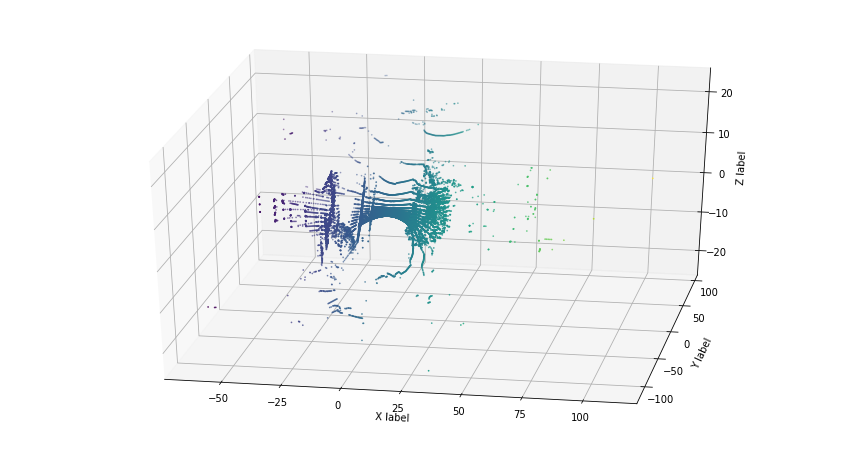

In [13]:
points=0.2
point_size=0.1*(1./points)
fig =  plt.figure(figsize=(15,8))
ax =  fig.add_subplot(111,projection="3d")
ax.scatter(X,Y,Z,c=X,s=point_size)

ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set_zlabel("Z label")
ax.view_init( azim=-80)
plt.show()

In [22]:
def captureIndex(starting_point_x,starting_point_y):
    index1=[]
    for i in range(0,len(Y)):
        if X[i]>=starting_point_x and X[i]<=starting_point_x+2 and Y[i]>=starting_point_y and Y[i]<= starting_point_y+2:
            index1.append(i)
    return index1

The code below collects the index of points width the region of interest, collecting cell by cell. Since we start from -20 to 20 and the length of the cell is 2.5 meter with the range of 12.5m then we needed a while loop which stops at 81 because of :=((-20-20)=-40/ 2.5)*(12.5/2.5) plus one for control

In [23]:
starting_point_x =-20
starting_point_y=0
index = []
counter=0
Points_OI_index=[]

In [30]:
while counter<805: 
    Ind=captureIndex(starting_point_x,starting_point_y)
    Points_OI_index.append(Ind)
    starting_point_x=starting_point_x+2
    if starting_point_x==20:
        starting_point_y=starting_point_y+2
        starting_point_x=starting_point_x-40
    counter=counter+1

Determine traversability of cells within the grid we define earlier. Calculating height variation by focusing the minimum and maximum point

In [31]:
traversable = []
non_traversable = []
for ind in range(0, len(Points_OI_index)):
    if len(Points_OI_index[ind])>1: 
        computing = [] 
        for el in Points_OI_index[ind]:
            computing.append(Z[el]) 
        if np.var(computing)<0.15:
            for el in Points_OI_index[ind]:
                traversable.append(el)
        elif np.var(computing)>0.15:
            for el in Points_OI_index[ind]:
                non_traversable.append(el)
                
      

We  extract x,y,z from the index of traversability and the index of non traversability.

In [32]:
X_tr=[]
Y_tr=[]
Z_tr=[]
for i in traversable:
    X_tr.append(X[i])
    Y_tr.append(Y[i])
    Z_tr.append(Z[i])

In [33]:
X_Ntr=[]
Y_Ntr=[]
Z_Ntr=[]
for j in non_traversable:
    X_Ntr.append(X[j])
    Y_Ntr.append(Y[j])
    Z_Ntr.append(Z[j])

Plot traversability and non traversability

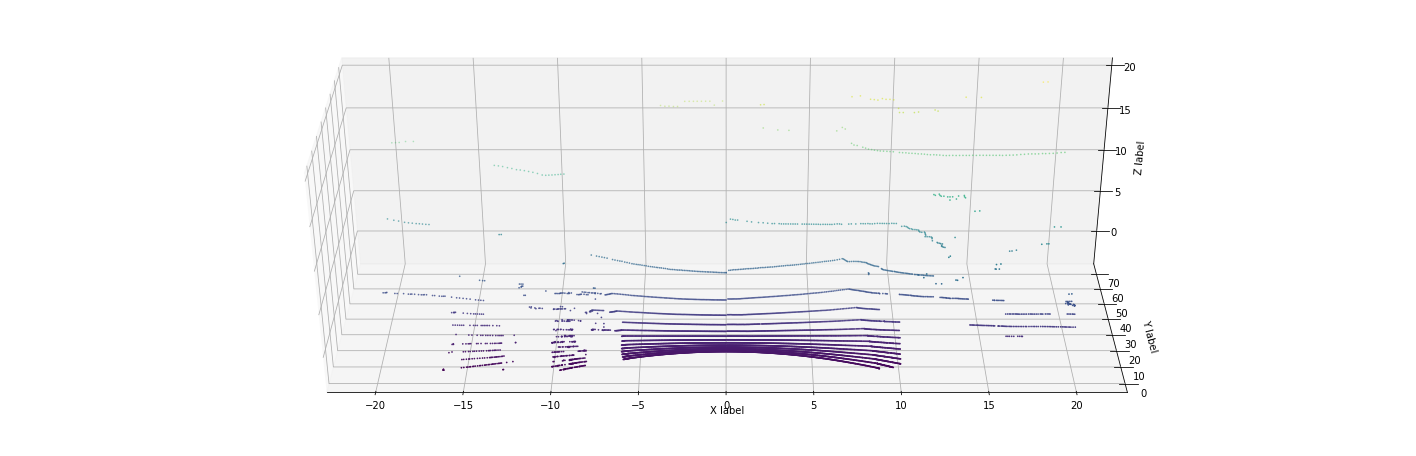

In [34]:
points=0.2
point_size=0.1*(1./points)
fig =  plt.figure(figsize=(25,8))
ax =  fig.add_subplot(111,projection="3d")
ax.scatter(X_tr,Y_tr,Z_tr, c=Z_tr,s=point_size)

ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set_zlabel("Z label")
ax.view_init( azim=-90)
plt.show()

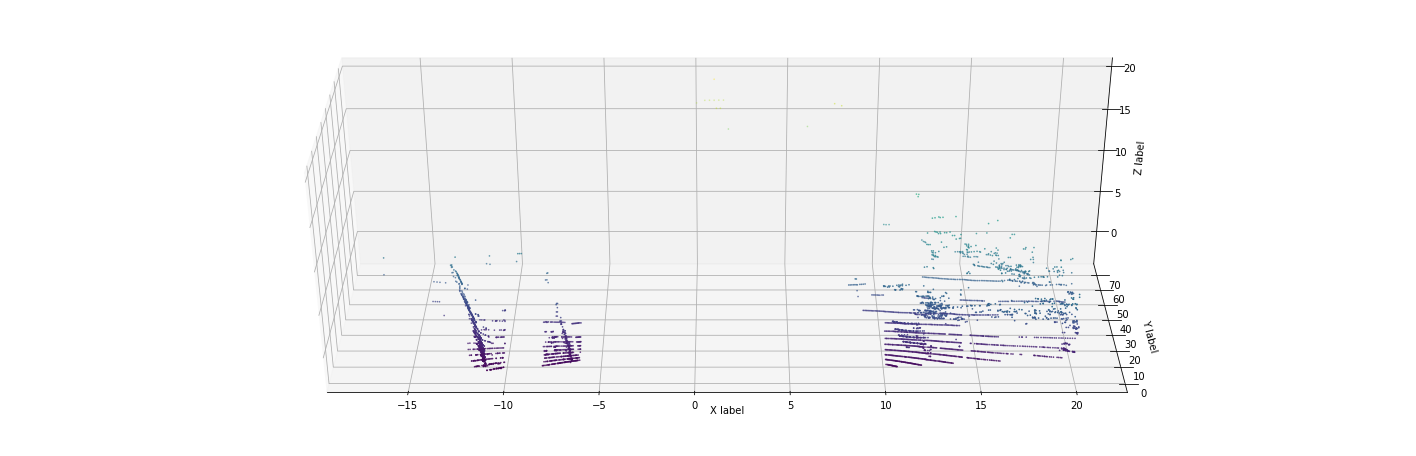

In [35]:
points=0.2
point_size=0.1*(1./points)
fig =  plt.figure(figsize=(25,8))
ax =  fig.add_subplot(111,projection="3d")
ax.scatter(X_Ntr,Y_Ntr,Z_Ntr,c=Z_Ntr,s=point_size)

ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set_zlabel("Z label")
ax.view_init( azim=-90)
plt.show()